In [ ]:


# library imports
import requests
import time
import pandas as pd
import numpy as np
import ast
import re
from tqdm import tqdm

# preprocessing imports
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# modeling imports
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.svm import SVR
sid = SentimentIntensityAnalyzer()

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import re# Remove punctuation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import spacy
from spacy import displacy
sp = spacy.load('en_core_web_sm')

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
# press d then 'stopwords' and then q

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import csv
turkish_df ='/content/drive/MyDrive/Airline Data collection/turkish_airlines.csv'
with open(turkish_df) as f:
  reader = csv.reader(f)
  header_row = next(reader)
  pros = []
  cons = []
  for row in reader:
    pros.append(row[6])
    cons.append(row[7])

In [ ]:
turkish_df =pd.read_csv('/content/drive/MyDrive/Airline Data collection/turkish_airlines.csv')
swiss_df =pd.read_csv('/content/drive/MyDrive/Airline Data collection/swissinter_airlines.csv')
singapore_df = pd.read_csv('/content/drive/MyDrive/Airline Data collection/singapore_airlines.csv')
qatar_df = pd.read_csv('/content/drive/MyDrive/Airline Data collection/qatar_airlines.csv')
qantas_df = pd.read_csv('/content/drive/MyDrive/Airline Data collection/qantas_airlines.csv')
korean_df = pd.read_csv('/content/drive/MyDrive/Airline Data collection/korean_airlines.csv')
japan_df = pd.read_csv('/content/drive/MyDrive/Airline Data collection/japan_airlines.csv')
emirates_df = pd.read_csv('/content/drive/MyDrive/Airline Data collection/emirates_airlines.csv')
allnippon_df= pd.read_csv('/content/drive/MyDrive/Airline Data collection/allnippon_airlines.csv')
france_df = pd.read_csv('/content/drive/MyDrive/Airline Data collection/airfrance_airlines.csv')

list_df = ['turkish_airlines','swissinter_airlines','singapore_airlines','qatar_airlines','qantas_airlines','korean_airlines','japan_airlines','emirates_airlines','allnippon_airlines','airfrance_airlines']

In [ ]:
pros= []
cons = []
for df in list_df:
  turkish_df = pd.read_csv('/content/drive/MyDrive/Airline Data collection/'+df+'.csv')
  turkish_df = turkish_df.drop(columns=['Summary', 'Date', 'JobTitle','AuthorLocation','OverallRating'], axis=1).sample()

  turkish_df['Pros_processed'] = \
  turkish_df['Pros'].map(lambda x: re.sub('[,\.!?]', '', x))# Convert the titles to lowercase
  turkish_df['Pros_processed'] = \
  turkish_df['Pros_processed'].map(lambda x: x.lower())# Print out the first rows of turkish_df
  turkish_df['Pros_processed'].head()
  turkish_df['Cons_processed'] = \
  turkish_df['Cons'].map(lambda x: re.sub('[,.!?]', '', x))
  turkish_df['Cons'].map(lambda x: re.sub('\\n', '', x))
  turkish_df['Cons'].map(lambda x: re.sub('\\n', '', x))# Convert the titles to lowercase
  turkish_df['Cons_processed'] = \
  turkish_df['Cons_processed'].map(lambda x: x.lower())# Print out the first rows of turkish_df
  turkish_df['Cons_processed'].head()

  p = turkish_df['Pros_processed'].values.tolist()
  pros.append(p)
  c = turkish_df['Cons_processed'].values.tolist()
  cons.append(c)

In [ ]:
def get_top_n_words(corpus, n=None):
    stops = stopwords.words('english')
    stops.append('gt')
    cvec = CountVectorizer(stop_words = stops).fit(corpus)
    bag_of_words = cvec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
turkish_df= qantas_df

In [ ]:
common_titles_1 = get_top_n_words(turkish_df['Cons'],10)
for word, freq in common_titles_1:
    print(word, freq)

management 69
company 67
career 55
work 49
salary 46
managers 43
time 42
much 38
working 38
turkish 34


In [ ]:
# Remove the columns
turkish_df = turkish_df.drop(columns=['Summary', 'Date', 'JobTitle','AuthorLocation','OverallRating'], axis=1).sample()# Print out the first rows of turkish_df
turkish_df.head()

,Unnamed: 0,Pros,Cons
0,0,"[['Awesomeness at every point lol', 'Good bene...","[['I couldn’t even tell you', 'Slow to adapt t..."


In [ ]:
# Load the regular expression library
import re# Remove punctuation
turkish_df['Pros_processed'] = \
turkish_df['Pros'].map(lambda x: re.sub('[,\.!?]', '', x))# Convert the titles to lowercase
turkish_df['Pros_processed'] = \
turkish_df['Pros_processed'].map(lambda x: x.lower())# Print out the first rows of turkish_df
turkish_df['Pros_processed'].head()

0    [['awesomeness at every point lol' 'good benef...
Name: Pros_processed, dtype: object

In [ ]:
# Load the regular expression library
import re# Remove punctuation
turkish_df['Cons_processed'] = \
turkish_df['Cons'].map(lambda x: re.sub('[,.!?]', '', x))
turkish_df['Cons'].map(lambda x: re.sub('\\n', '', x))
turkish_df['Cons'].map(lambda x: re.sub('\\n', '', x))# Convert the titles to lowercase
turkish_df['Cons_processed'] = \
turkish_df['Cons_processed'].map(lambda x: x.lower())# Print out the first rows of turkish_df
turkish_df['Cons_processed'].head()

0    [['i couldn’t even tell you' 'slow to adapt to...
Name: Cons_processed, dtype: object

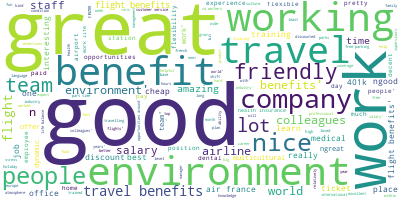

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(turkish_df['Pros_processed'].values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

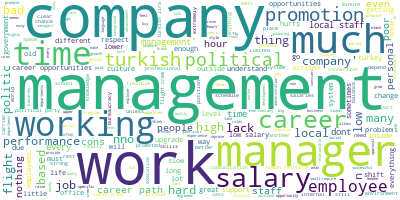

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(turkish_df['Cons_processed'].values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','good','great','ngood','get','new','lot','different','best'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

data = pros
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['awesomeness', 'every', 'point', 'lol', 'benefits', 'like', 'pass', 'tickets', 'holidays', 'private', 'health', 'insurance', 'lots', 'benefits', 'like', 'discounted', 'tickets', 'airlines', 'couple', 'free', 'tax', 'tickets', 'every', 'year', 'crew', 'meals', 'fast', 'paced', 'environment', 'plenty']


In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','good','great','get','like','nothing','many','hard','bad','lot','nno','cons'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

data = cons
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['even', 'tell', 'slow', 'adapt', 'changing', 'market', 'conditions', 'work', 'rest', 'balance', 'currently', 'broken', 'due', 'employee', 'shortage', 'nturkish', 'lira', 'based', 'salaries', 'job', 'company', 'grateful', 'opportunity', 'career', 'path', 'ninexperienced', 'management', 'nworkload', 'poor', 'management']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 4), (17, 1), (18, 2), (19, 4), (20, 4), (21, 2), (22, 1), (23, 2), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.018*"work" + 0.017*"management" + 0.010*"company" + 0.010*"hours" + '
  '0.010*"salary" + 0.009*"working" + 0.009*"long" + 0.008*"time" + '
  '0.007*"culture" + 0.006*"people"'),
 (1,
  '0.014*"work" + 0.014*"company" + 0.014*"management" + 0.011*"time" + '
  '0.009*"hours" + 0.008*"working" + 0.007*"salary" + 0.007*"long" + '
  '0.007*"job" + 0.006*"much"'),
 (2,
  '0.013*"work" + 0.012*"company" + 0.011*"management" + 0.006*"time" + '
  '0.006*"people" + 0.006*"working" + 0.005*"career" + 0.005*"much" + '
  '0.005*"long" + 0.005*"crew"'),
 (3,
  '0.016*"work" + 0.015*"management" + 0.013*"company" + 0.010*"hours" + '
  '0.008*"working" + 0.007*"time" + 0.006*"culture" + 0.006*"staff" + '
  '0.006*"career" + 0.006*"long"'),
 (4,
  '0.016*"work" + 0.014*"company" + 0.009*"time" + 0.008*"management" + '
  '0.007*"hours" + 0.007*"salary" + 0.007*"staff" + 0.006*"working" + '
  '0.006*"long" + 0.006*"culture"')]


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
# !pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
import pickle
import os

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/drive/MyDrive/Airline Data collection/results/cons_ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/content/drive/MyDrive/Airline Data collection/results/cons_ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.004798  0.002956       1        1  58.591479
3     -0.004169 -0.003309       2        1  39.263290
1      0.000085  0.001962       3        1   1.575385
4      0.002171 -0.002426       4        1   0.566649
2      0.006711  0.000817       5        1   0.003197, topic_info=            Term         Freq        Total Category  logprob  loglift
1252        work  1521.000000  1521.000000  Default  30.0000  30.0000
618   management  1455.000000  1455.000000  Default  29.0000  29.0000
208      company  1014.000000  1014.000000  Default  28.0000  28.0000
1143        time   646.000000   646.000000  Default  27.0000  27.0000
1256     working   747.000000   747.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1067       staff     0.011484   523.466324   Topic5  -5.5112  -0.3765
992       salary     0.011819   684.997403   Topic5  -5.4824  -0.6166
872         poor     0.007763   265.720228   Topic5  -5.9028  -0.0901
492        hours     0.012334   887.464928   Topic5  -5.4397  -0.8329
544          job     0.008955   494.010273   Topic5  -5.7599  -0.5673

[449 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
6212      1  0.602459      accommodate
6212      2  0.301229      accommodate
6213      1  0.489659  accomplishments
6213      2  0.489659  accomplishments
6214      1  0.757010          accrued
...     ...       ...              ...
1268      2  0.422432            years
1268      3  0.016631            years
1268      4  0.006652            years
6460      1  0.739460          yelling
6460      2  0.184865          yelling

[726 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 5, 3])